# Linear model for Boston

You try to process a very similar dataset to the lecture. This time the house prices are from Portland and are relatively recent.

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

To make things easier, only some columns were selected from the original dataset and the number of records was also significantly reduced.

!!! For this reason, the subset created may not statistically match the original dataset.

A bonus task is to process the original dataset.

## Sub dataset
- Data = structure with filled data
- m = number of rows = 100
- x's = input variable / features
- y's = output variable / target
- (x, y) = one row from training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

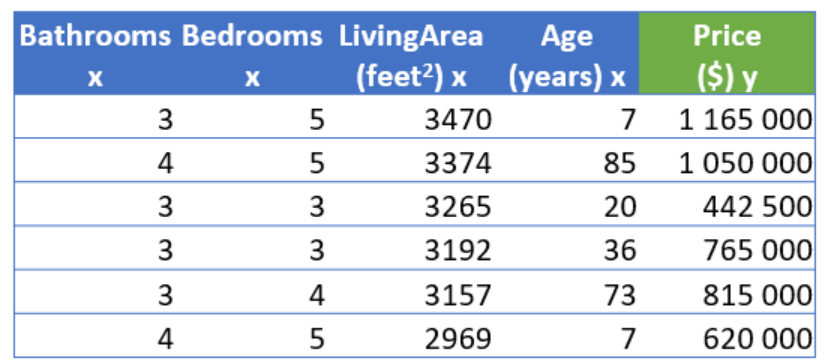

# Task
- Create a regression linearization model from the parameters you selected last exercise
- Standardize the data before processing
- Create the model manually
- Create the model using scikit-learn

# Data loading

In [19]:
# Import necessary libraries (ensure these run successfully first)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assume 'data' DataFrame is loaded via pd.read_csv(...)

# --- CORRECTED COLUMN NAMES ---
# Using the verified column names from the dataset.
FEATURE_COLS = ['bathrooms', 'bedrooms', 'livingArea', 'age']
TARGET_COL = 'price'

# 1. Select Features (X) and Target (y)
X = data[FEATURE_COLS]
y = data[TARGET_COL]

# 2. SPLIT DATA (Train and Validation Sets)
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. STANDARDIZE THE DATA
scaler = StandardScaler()
# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train_raw)
X_val_scaled = scaler.transform(X_val_raw)

# Convert y to numpy array for matrix operations in the Manual Model
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_val_np = y_val.to_numpy().reshape(-1, 1)

print("✅ Data Preparation and Standardization Complete.")

✅ Data Preparation and Standardization Complete.


In [20]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

# Linear model without using libraries
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model


## MANUAL LINEAR MODEL (Using Normal Equation)

⭐ Model Parameters (Manual) ⭐
Intercept (w0): 515,525.29
Coefficients:
  bathrooms: 73,934.8398
  bedrooms: -3,599.7200
  livingArea: 76,728.7675
  age: 60,800.3394

📈 Validation Scores (Manual Model) 📈
R2 Score: 0.4425
MSE: 21,991,132,228.64


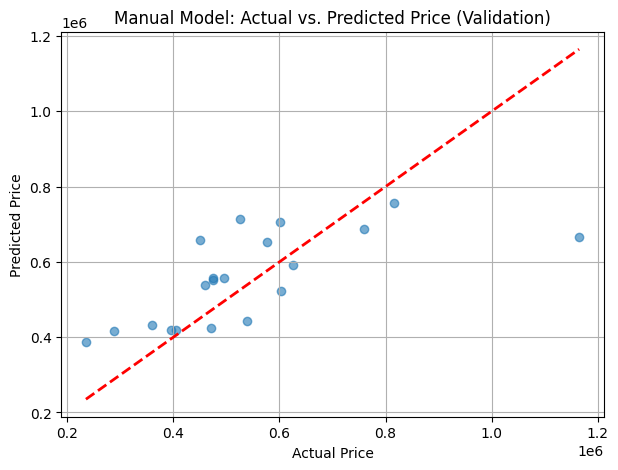

In [22]:
print("\n" + "="*60)
print("## MANUAL LINEAR MODEL (Using Normal Equation)")
print("="*60)

# 1. Calculate Parameters (w = inv(X_T * X) * X_T * y)
# Add column of ones for the intercept (w0)
X_train_manual = np.insert(X_train_scaled, 0, 1, axis=1)
X_T = X_train_manual.T
w = np.linalg.inv(X_T @ X_train_manual) @ X_T @ y_train_np

# Separate parameters
w0_manual = w[0][0]
w_manual = w[1:]

### List its parameters
print("\n⭐ Model Parameters (Manual) ⭐")
print(f"Intercept (w0): {w0_manual:,.2f}")
print("Coefficients:")
for name, coeff in zip(FEATURE_COLS, w_manual.flatten()):
    print(f"  {name}: {coeff:,.4f}")

# 2. Predictions and Scores
X_val_manual = np.insert(X_val_scaled, 0, 1, axis=1)
y_val_pred_manual = X_val_manual @ w

### List its scores for training and validation data
r2_val_manual = r2_score(y_val_np, y_val_pred_manual)
mse_val_manual = mean_squared_error(y_val_np, y_val_pred_manual)

print("\n📈 Validation Scores (Manual Model) 📈")
print(f"R2 Score: {r2_val_manual:.4f}")
print(f"MSE: {mse_val_manual:,.2f}")

### Visualize the model
plt.figure(figsize=(7, 5))
plt.scatter(y_val, y_val_pred_manual, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title("Manual Model: Actual vs. Predicted Price (Validation)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

# Linear model using scikit-learn
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model


## SCIKIT-LEARN LINEAR MODEL

⭐ Model Parameters (scikit-learn) ⭐
Intercept (w0): 515,525.29
Coefficients:
  bathrooms: 73,934.8398
  bedrooms: -3,599.7200
  livingArea: 76,728.7675
  age: 60,800.3394

📈 Validation Scores (scikit-learn Model) 📈
R2 Score: 0.4425
MSE: 21,991,132,228.64


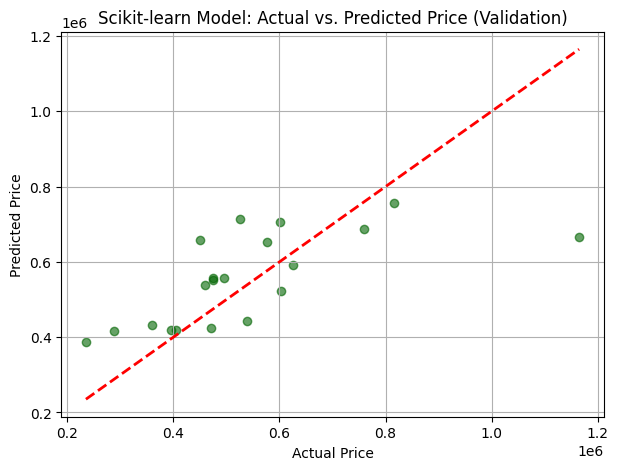

In [23]:
print("\n" + "="*60)
print("## SCIKIT-LEARN LINEAR MODEL")
print("="*60)

# 1. Create and Train the Model
model_skl = LinearRegression()
model_skl.fit(X_train_scaled, y_train)

### List its parameters
w0_skl = model_skl.intercept_
w_skl = model_skl.coef_

print("\n⭐ Model Parameters (scikit-learn) ⭐")
print(f"Intercept (w0): {w0_skl:,.2f}")
print("Coefficients:")
for name, coeff in zip(FEATURE_COLS, w_skl):
    print(f"  {name}: {coeff:,.4f}")

# 2. Predictions and Scores
y_val_pred_skl = model_skl.predict(X_val_scaled)

### List its scores for training and validation data
r2_val_skl = r2_score(y_val, y_val_pred_skl)
mse_val_skl = mean_squared_error(y_val, y_val_pred_skl)

print("\n📈 Validation Scores (scikit-learn Model) 📈")
print(f"R2 Score: {r2_val_skl:.4f}")
print(f"MSE: {mse_val_skl:,.2f}")


### Visualize the model
plt.figure(figsize=(7, 5))
plt.scatter(y_val, y_val_pred_skl, alpha=0.6, color='darkgreen')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title("Scikit-learn Model: Actual vs. Predicted Price (Validation)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()